# Testing models 

In [ ]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

helper_path = os.path.abspath(os.path.join('../helper'))
if helper_path not in sys.path:
    sys.path.append(helper_path)

In [1]:
from helper.models.config import *
from helper.models.nvidia_ade20k import *
from helper.models.deeplab_mobilenet import *
from helper.models.unet import *
from helper.data.dataobj import DrainageDataset
from torch.utils.data import DataLoader
from helper.data.dataobj import DrainageDataset
from sklearn.model_selection import train_test_split
from helper.utilities import *
from helper.callbacks.logs import save_history_callback, save_resulting_callback
from helper.callbacks.visualize import *
from transformers import logging
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
logging.set_verbosity_error()

In [ ]:
device = 'cuda'
images = np.load('../helper/data/datasets/new_images.npy').astype(np.uint8)
masks = np.load('../helper/data/datasets/new_masks.npy')

train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

print('Getting test dataset')
bins = [get_bin(mask) for mask in masks]

train_images, test_images, train_masks, test_masks = train_test_split(images, masks, test_size=test_ratio, stratify=bins, random_state=42)


test_dataset = DrainageDataset(test_images, test_masks, device='cuda', mode='test')
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

Getting test dataset


In [3]:
predictions = []
image, mask = test_dataset[14]

In [4]:
model_d = DeepLab(device=device)
model_d.load('../helper/models/saved/DeepLabV3-1.pt')
model_nv = NvidiaSegformer(device=device)
model_nv.load('../helper/models/saved/NvidiaSegformer-7.pt')
model_u = UNet(device=device)
model_u.load('../helper/models/saved/UNet-2.pt')

models = [model_d, model_nv, model_u]

Initialized DeepLabV3
Initialized NvidiaSegformer
Initialized UNet


In [4]:
train_dataset = DrainageDataset(train_images, train_masks, device='cuda', mode='test')
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=False, num_workers=4)

In [5]:
for model in models:
    predictions.append(model.predict(image, mask, device, show_full=False, show=False))

In [2]:
train_dataset.show(14, processed=False)

NameError: name 'train_dataset' is not defined

2 2 goida


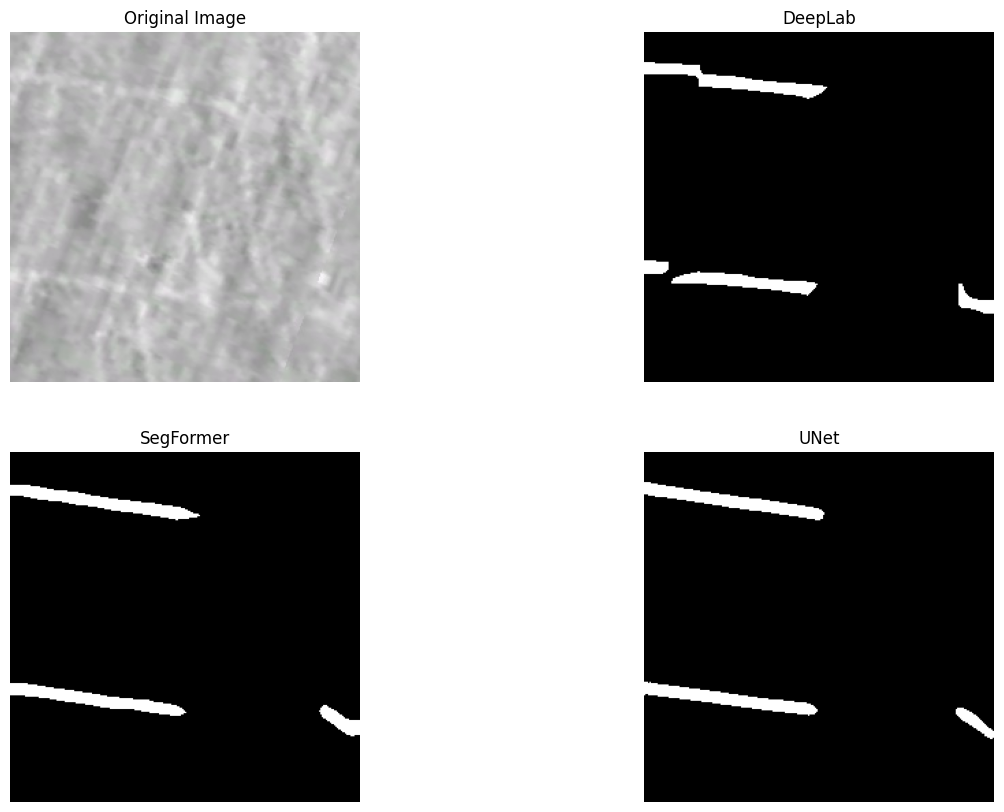

In [8]:
show_predictions(image, predictions, ['DeepLab', 'SegFormer', 'UNet'])